/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


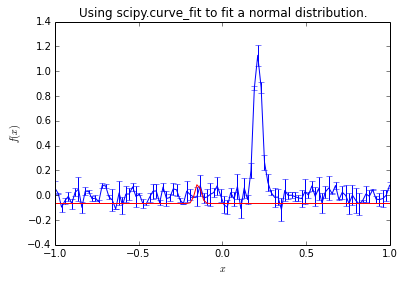

In [4]:
'''Using scipy.curve_fit to fit a normal distribution to data.'''

import random

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
	a, b, c, d = p
	y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

	return y

# Choose some starting params for our distribution and perturb them
# using random numbers.
p_initial = [1.0, 0.0, 0.1, 0.0]
p_perturbed = [i + 0.5*(random.random()*2 - 1.) for i in p_initial]

N = 100 # Number of data points.

# Create our data sets. Perturb the y-data with randomness and
# generate completely random data for the errors.
x = np.linspace(-1, 1, N)
y = np.array([gauss(i, *p_perturbed) + 0.1*(random.random()*2. - 1.) for i in x])
e = np.array([random.random()*0.1 for _ in y])

# Use curve_fit to fit the gauss function to our data. Use the
# unperturbed p_initial as our initial guess.
popt, pcov = curve_fit(gauss, x, y, p0=p_initial, sigma=e)

# Generate y-data based on the fit.
y_fit = gauss(x, *popt)

# Create a plot of our work, showing both the data and the fit.
fig, ax = plt.subplots()

ax.errorbar(x,y,e)
ax.plot(x, y_fit, color = 'red')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('Using scipy.curve_fit to fit a normal distribution.')

plt.show()